In [360]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing and Normalizing data:
from sklearn.preprocessing import StandardScaler

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Standardizing data
from sklearn.decomposition import PCA


# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [113]:
link = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
df = pd.read_csv(link)


In [ ]:
"""# EDA :

1. there are total of 1599 rows and 12 columns , 
   all features are of float 64 data type
   no nulls are present.

2. By checking the data distribution, skewness is detected and outliers can also be seen.
   Skewness needs to be corrected and outliers need to be removed.
   
3. By checking the value counts of label i.e. 'Quality' column , it can be concluded that 
   data set is imbalanced, and it needs to be balanced and we will use SMOTE method.
   
4. As we are unsure about whether which most important features to be considered for predicting wine quality,
   we will use feature selection methods, we can observe that 'volatile acidity' has high negative corelation 
   with label ie 'Quality' thus we have decided to drop it.
   
5. By using various models to predict categorical data ie quality of wine, we conclude that KNN model is giving the best
   result: 
   
   Train result:  100.0 Percent
   Test result:  85.779 Percent
   
   Hyper parameter tuning is done and this result is obtained by chosing the best parameters i.e. 
   {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1}
   
"""

In [114]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [115]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [116]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [117]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [118]:
df.shape

(1599, 12)

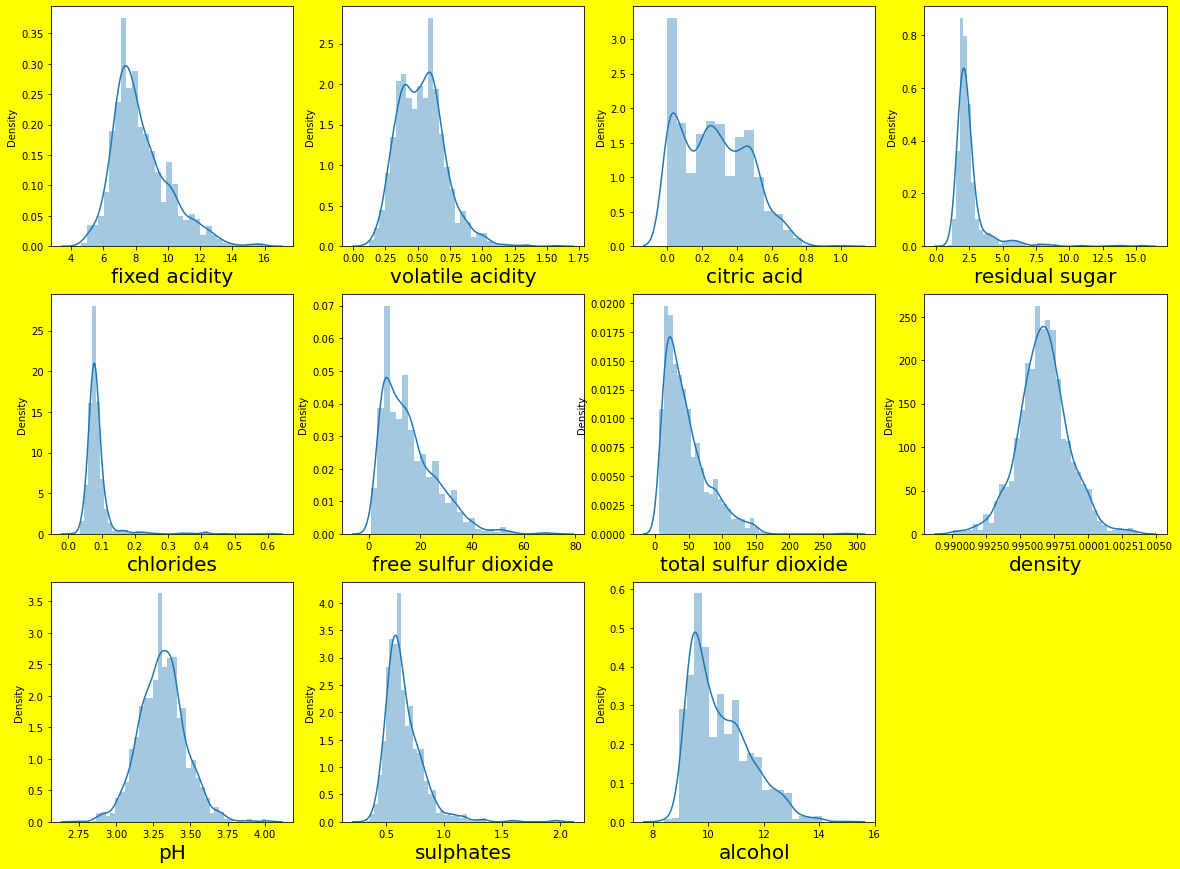

In [119]:
# Checking data distribution:

plt.figure(figsize=(20,15),facecolor='Yellow')
plotnumber = 1
for column in df.columns:
    if plotnumber <= 11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [120]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [121]:
# Using Z Statistics to remove outliers:

from scipy.stats import zscore

col = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                    'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

z_score = zscore(df[col])

abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1) # values lying in 3 times std will be removed

df = df[filtering_entry]

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,5.646776
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.801119
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [122]:
df.skew().sort_values(ascending=False)

residual sugar          2.450707
chlorides               2.307274
total sulfur dioxide    1.185230
sulphates               0.893297
free sulfur dioxide     0.869727
fixed acidity           0.820879
alcohol                 0.757396
volatile acidity        0.392097
citric acid             0.292600
quality                 0.248823
pH                      0.113039
density                 0.055543
dtype: float64

In [123]:
# Checking skewness

df_new = pd.DataFrame(df,columns=df.columns)
df_new.skew().sort_values(ascending=False)

residual sugar          2.450707
chlorides               2.307274
total sulfur dioxide    1.185230
sulphates               0.893297
free sulfur dioxide     0.869727
fixed acidity           0.820879
alcohol                 0.757396
volatile acidity        0.392097
citric acid             0.292600
quality                 0.248823
pH                      0.113039
density                 0.055543
dtype: float64

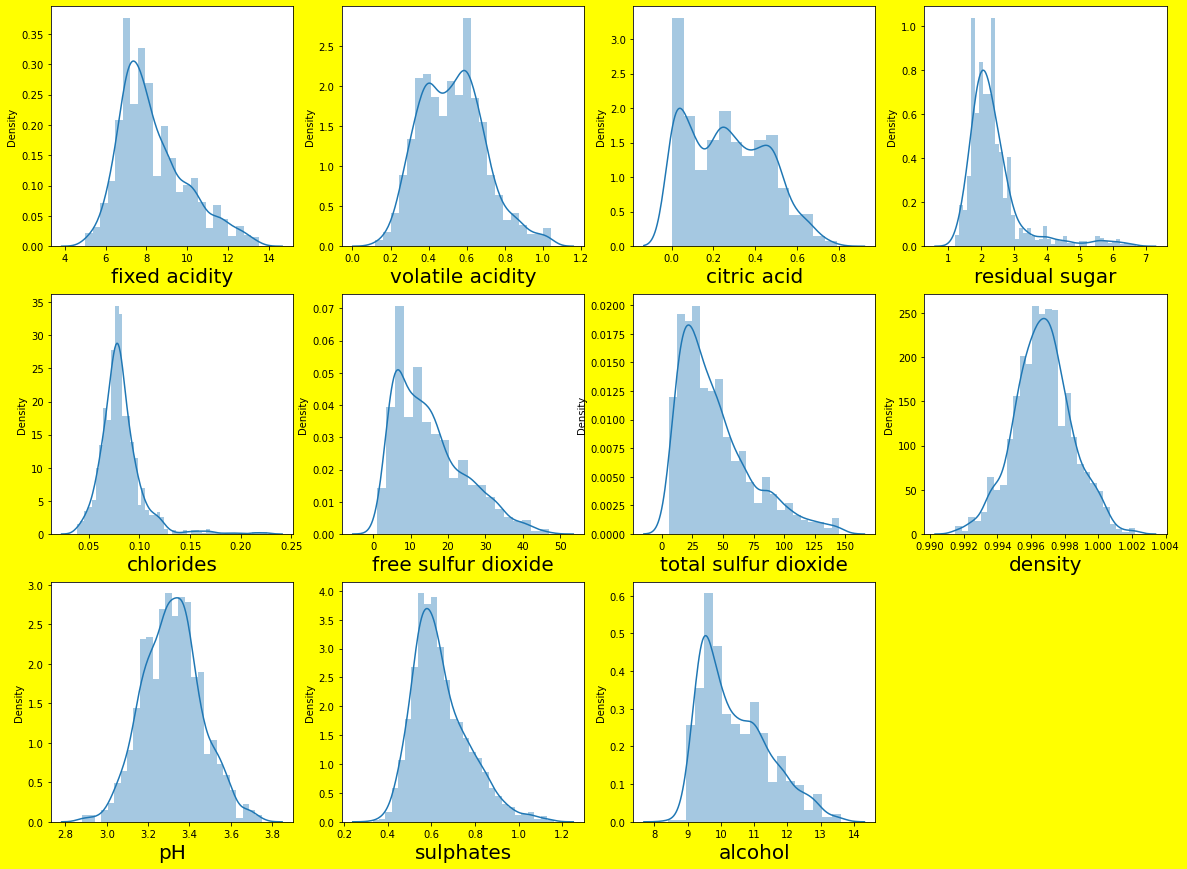

In [124]:
# Checking data distribution:

plt.figure(figsize=(20,15),facecolor='Yellow')
plotnumber = 1
for column in df_new.columns:
    if plotnumber <= 11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

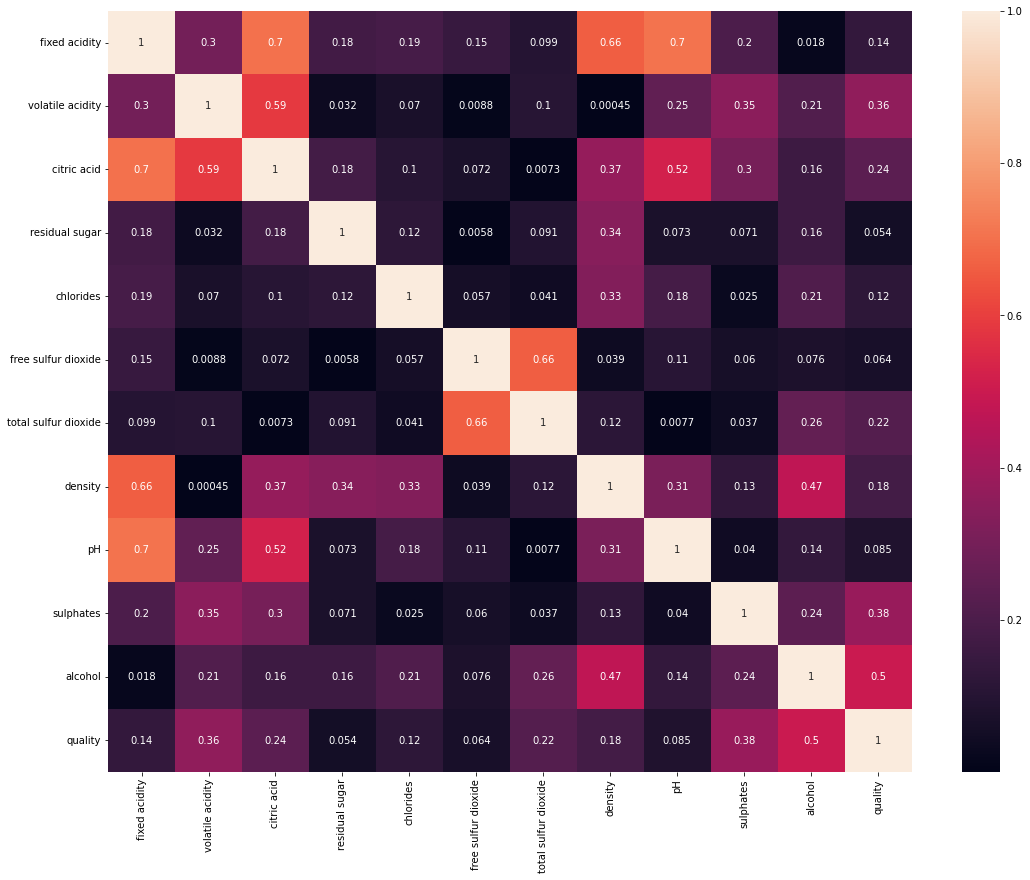

In [125]:
df_corr = df_new.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

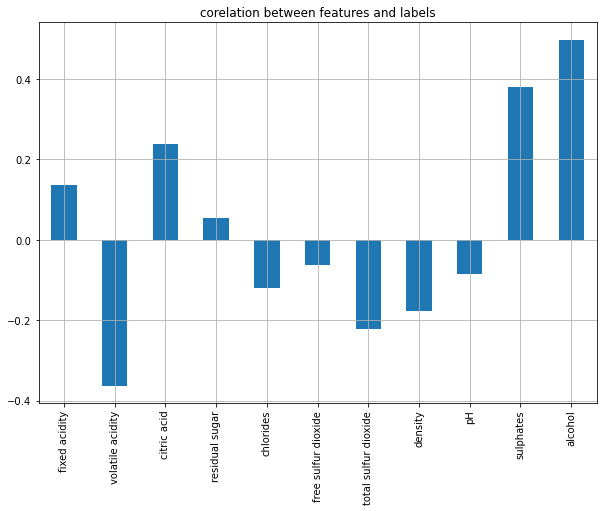

In [151]:
df_new.drop(columns = 'quality',axis = 1).corrwith(df_new.quality).plot(kind='bar',grid=True,figsize=(10,7),title='corelation between features and labels')
plt.show()

In [197]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [338]:
# relevant features:

features = ['fixed acidity','citric acid','residual sugar','sulphates','alcohol','free sulfur dioxide','pH','chlorides','density','total sulfur dioxide']

df_relevant = df[features]

df_relevant.head()

,fixed acidity,citric acid,residual sugar,sulphates,alcohol,free sulfur dioxide,pH,chlorides,density,total sulfur dioxide
0,7.4,0.00,1.9,0.56,9.4,11.0,3.51,0.076,0.9978,34.0
1,7.8,0.00,2.6,0.68,9.8,25.0,3.20,0.098,0.9968,67.0
2,7.8,0.04,2.3,0.65,9.8,15.0,3.26,0.092,0.9970,54.0
3,11.2,0.56,1.9,0.58,9.8,17.0,3.16,0.075,0.9980,60.0
4,7.4,0.00,1.9,0.56,9.4,11.0,3.51,0.076,0.9978,34.0


In [339]:
# Splitting data:

y = df_new.quality
X_old = df_relevant

In [340]:
# CREATING SUBSET OF SELECTED FEATURES:

X_old = df[features]
y = df.quality

In [341]:
# Transforming data to remove skewness

from sklearn.preprocessing import power_transform, PowerTransformer

pt = PowerTransformer()

X = pt.fit_transform(X_old)

X

array([[-0.46910218, -1.52186998, -0.61004987, ..., -0.14567427,
         0.63523271, -0.06331188],
       [-0.17212704, -1.52186998,  0.64801055, ...,  0.98110534,
         0.05629143,  0.95491921],
       [-0.17212704, -1.24278981,  0.20720782, ...,  0.71458543,
         0.17254504,  0.62695865],
       ...,
       [-1.45195519, -0.66389542,  0.20720782, ..., -0.14567427,
        -0.5637654 ,  0.17703967],
       [-1.88631136, -0.72514559, -0.37438536, ..., -0.2077279 ,
        -0.72276209,  0.31909608],
       [-1.77310975,  1.0702808 ,  1.54128132, ..., -0.74493844,
        -0.71096976,  0.2496603 ]])

In [289]:
# Using PCA i.e. Principal Component Analysis that is a diamensionallity reduction technique:

pca = PCA()
pca.fit_transform(X)

array([[ 1.28369046, -1.7606351 ,  0.01426704, ...,  0.11402918,
        -0.6963356 ,  0.1066162 ],
       [-0.07660244, -1.13369007, -1.08449287, ..., -1.67201763,
        -0.0740507 , -0.0171542 ],
       [ 0.06553437, -1.01401896, -0.43275197, ..., -1.09225669,
        -0.14764419, -0.0385306 ],
       ...,
       [ 1.68412281,  0.55384463, -1.61795072, ..., -0.33078527,
         0.18984228, -0.46737433],
       [ 2.55372017, -0.16633623, -1.57043663, ...,  0.38861894,
         0.34341751, -0.1621372 ],
       [ 0.97516751,  1.24646085, -1.44163447, ...,  0.5248941 ,
         1.67898524, -0.57422908]])

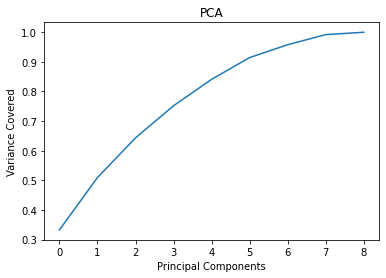

In [290]:
# Using Scree Plot to identify best components:

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [337]:
pca = PCA(n_components=8)
pca.fit_transform(X)
new_pcomp = pca.fit_transform(X)
princi_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.283690,-1.760635,0.014267,0.172478,0.824266,-0.925330,0.114029,-0.696336
1,-0.076602,-1.133690,-1.084493,-0.435778,-0.130932,0.775696,-1.672018,-0.074051
2,0.065534,-1.014019,-0.432752,-0.010561,0.312446,0.394025,-1.092257,-0.147644
3,-2.018036,-0.002741,1.033814,-1.124613,-0.704830,-0.244918,0.582094,-0.262701
4,1.283690,-1.760635,0.014267,0.172478,0.824266,-0.925330,0.114029,-0.696336
...,...,...,...,...,...,...,...,...
1453,2.252722,-0.651621,-1.044927,-0.590716,-0.355320,1.173983,0.173511,0.028933
1454,2.803337,0.938449,-1.858344,-1.162084,-0.170417,-0.227856,-0.165917,0.136065
1455,1.684123,0.553845,-1.617951,-0.690534,0.070032,0.364964,-0.330785,0.189842
1456,2.553720,-0.166336,-1.570437,-1.071734,0.467614,0.079793,0.388619,0.343418


In [296]:
X.shape

(1458, 9)

In [266]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
3      7
Name: quality, dtype: int64

In [342]:
# Balancing dataset

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

In [343]:
X_resampled.shape

(3702, 10)

In [344]:
y_resampled.value_counts()

5    617
6    617
7    617
4    617
8    617
3    617
Name: quality, dtype: int64

In [345]:
# Spliting dataset

x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size = 0.30 , random_state=42)

In [346]:
# Defining function for model confidence and accuracy:

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train == True:
        y_pred = clf.predict(x_train)
        print('Train result: ',round(accuracy_score(y_train,y_pred)*100,3),'Percent')
    elif train == False:
        pred = clf.predict(x_test)
        print('Test result: ',round(accuracy_score(y_test,pred)*100,3),'Percent')
        
        print('\n\n Test Classification report: \n\n',classification_report(y_test,pred,digits=2)) ##Model confidence/accuracy

In [347]:
# Checking via svc model

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train,y_test,train=True)

metric_score(svc,x_train,x_test,y_train,y_test,train=False)

Train result:  82.632 Percent
Test result:  77.498 Percent


 Test Classification report: 

               precision    recall  f1-score   support

           3       0.92      1.00      0.96       184
           4       0.80      0.89      0.84       188
           5       0.69      0.63      0.65       195
           6       0.59      0.42      0.49       201
           7       0.71      0.78      0.74       173
           8       0.88      0.99      0.94       170

    accuracy                           0.77      1111
   macro avg       0.76      0.78      0.77      1111
weighted avg       0.76      0.77      0.76      1111



In [348]:
# HyperParameter Tuning in SVM and finding best parameters:

param_grid = {'C':[1,5,10,20],'gamma':[0.001,0.01,0.02,0.002]}

grd = GridSearchCV(svc,param_grid)

grd.fit(x_train,y_train)

grd.best_params_

{'C': 20, 'gamma': 0.02}

In [349]:
# Using best parameters for improved score:

svc = SVC(C=20,gamma=0.02)

svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train,y_test,train=True)

metric_score(svc,x_train,x_test,y_train,y_test,train=False)

Train result:  80.741 Percent
Test result:  75.608 Percent


 Test Classification report: 

               precision    recall  f1-score   support

           3       0.89      1.00      0.94       184
           4       0.77      0.90      0.83       188
           5       0.66      0.58      0.62       195
           6       0.57      0.38      0.46       201
           7       0.69      0.73      0.71       173
           8       0.85      1.00      0.92       170

    accuracy                           0.76      1111
   macro avg       0.74      0.77      0.75      1111
weighted avg       0.74      0.76      0.74      1111



In [350]:
# Checking via knn model

from sklearn.neighbors import KNeighborsClassifier

# Innitiate k neighbour classifier:

knn = KNeighborsClassifier()

# Model Training:

knn.fit(x_train,y_train)

# Calling metric_score function:

metric_score(knn,x_train, x_test, y_train, y_test,train=True)

metric_score(knn,x_train, x_test, y_train, y_test,train=False)

Train result:  85.488 Percent
Test result:  78.938 Percent


 Test Classification report: 

               precision    recall  f1-score   support

           3       0.92      1.00      0.96       184
           4       0.75      0.99      0.85       188
           5       0.73      0.52      0.61       195
           6       0.65      0.41      0.50       201
           7       0.74      0.90      0.81       173
           8       0.89      0.99      0.94       170

    accuracy                           0.79      1111
   macro avg       0.78      0.80      0.78      1111
weighted avg       0.78      0.79      0.77      1111



In [351]:
# HyperParameter Tuning in SVM and finding best parameters:

param_gridknn = {'n_neighbors':[1,2,3,4,5],'algorithm':['ball_tree', 'kd_tree'],'leaf_size':[1,2,3,4,5]}

grd_knn = GridSearchCV(knn,param_gridknn)

grd_knn.fit(x_train,y_train)

grd_knn.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1}

In [352]:
# Innitiate k neighbour classifier:

knn = KNeighborsClassifier(algorithm='ball_tree',leaf_size=1,n_neighbors=1)

# Model Training:

knn.fit(x_train,y_train)

# Calling metric_score function:

metric_score(knn,x_train, x_test, y_train, y_test,train=True)

metric_score(knn,x_train, x_test, y_train, y_test,train=False)

Train result:  100.0 Percent
Test result:  85.779 Percent


 Test Classification report: 

               precision    recall  f1-score   support

           3       0.96      1.00      0.98       184
           4       0.89      0.99      0.93       188
           5       0.74      0.67      0.70       195
           6       0.73      0.56      0.63       201
           7       0.84      0.99      0.91       173
           8       0.95      0.99      0.97       170

    accuracy                           0.86      1111
   macro avg       0.85      0.87      0.86      1111
weighted avg       0.85      0.86      0.85      1111



In [353]:
# Checking via GBC model

from sklearn.ensemble import GradientBoostingClassifier

gbdt_clf = GradientBoostingClassifier()

# Training the model
gbdt_clf.fit(x_train,y_train)

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)



Train result:  93.593 Percent
Test result:  80.288 Percent


 Test Classification report: 

               precision    recall  f1-score   support

           3       0.91      0.98      0.94       184
           4       0.86      0.91      0.89       188
           5       0.71      0.66      0.68       195
           6       0.66      0.52      0.58       201
           7       0.72      0.82      0.77       173
           8       0.93      0.98      0.95       170

    accuracy                           0.80      1111
   macro avg       0.80      0.81      0.80      1111
weighted avg       0.80      0.80      0.80      1111



In [354]:
# HYPER PARAMETER TUNING:

# Tuning parameters using GridSearchCV:

params = {'max_depth':[4],
          'min_samples_split':[2,4]} # at which rate our model should learn

grd = GridSearchCV(gbdt_clf,param_grid=params)

grd.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [4], 'min_samples_split': [2, 4]})

In [355]:
gbdt_clf_f = GradientBoostingClassifier(learning_rate=0.1, max_depth=7, min_samples_split=2)

# Training the model
gbdt_clf_f.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=7)

In [356]:

metric_score(gbdt_clf_f,x_train,x_test,y_train,y_test,train=True)

metric_score(gbdt_clf_f,x_train,x_test,y_train,y_test,train=False)

Train result:  100.0 Percent
Test result:  83.348 Percent


 Test Classification report: 

               precision    recall  f1-score   support

           3       0.95      0.98      0.97       184
           4       0.94      0.93      0.94       188
           5       0.70      0.70      0.70       195
           6       0.63      0.60      0.62       201
           7       0.82      0.85      0.83       173
           8       0.98      0.98      0.98       170

    accuracy                           0.83      1111
   macro avg       0.84      0.84      0.84      1111
weighted avg       0.83      0.83      0.83      1111



In [364]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('Transformer',PowerTransformer()),('pca',PCA(n_components=10)),('knn',KNeighborsClassifier(algorithm='ball_tree',leaf_size=1,n_neighbors=1))])

pipe.fit(x_train,y_train)

Pipeline(steps=[('Transformer', PowerTransformer()),
                ('pca', PCA(n_components=10)),
                ('knn',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=1,
                                      n_neighbors=1))])

In [366]:
y_ppred = pipe.predict(x_test)

In [367]:
accuracy_score(y_test,y_ppred)

0.8532853285328533

In [370]:
# Saving model to pickle string

import pickle 
saved_model = pickle.dumps(pipe) 
pipe_pickle = pickle.loads(saved_model)
pipe_pickle.predict(x_test) # predicting testing data


array([3, 4, 7, ..., 3, 5, 3], dtype=int64)